# Building a multiple linear regression model for the prediction of car prices

### Importing and understanding data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None
# pd.options.display.max_rows = 205
pd.options.display.max_columns = 100

In [3]:
# Identifying the encoding of the csv file to be used for this assignment

with open(r'C:\upGrad\Course 2\Linear Regression - Assignment\CarPrice_Assignment.csv') as f:
    print(f)

<_io.TextIOWrapper name='C:\\upGrad\\Course 2\\Linear Regression - Assignment\\CarPrice_Assignment.csv' mode='r' encoding='cp1252'>


In [4]:
# Importing CarPrice_Assignment.csv

path = r'C:\upGrad\Course 2\Linear Regression - Assignment'
carprice = pd.read_csv(path + '\\CarPrice_Assignment.csv')

In [5]:
# Looking at the first five rows

carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###### Checking for duplicate IDs

In [6]:
# Making sure that number of duplicate rows are zero

sum(carprice.duplicated(subset = 'car_ID')) == 0

True

###### Primary Checks

In [7]:
# Determining the number of rows and columns in carprice

carprice.shape

(205, 26)

In [8]:
# Inspecting carprice

carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
# Getting statistical information for the numerical features of carprice

carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# Identifying the categorical variables for carprice

cat_vars = carprice.select_dtypes('object').columns
cat_vars

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [11]:
# Getting rid of the car model name from CarName and retaining only the name of the car company

carprice['CarName'] = carprice.CarName.str.split(" ", n = 1, expand = True)[0]

In [12]:
# Retrieving frequency distribution for the categorical variables' unique values

for col in cat_vars:
    print(carprice[col].value_counts().to_frame(), end='\n\n')

             CarName
toyota            31
nissan            17
mazda             15
mitsubishi        13
honda             13
subaru            12
volvo             11
peugeot           11
volkswagen         9
dodge              9
buick              8
bmw                8
audi               7
plymouth           7
saab               6
porsche            4
isuzu              4
alfa-romero        3
chevrolet          3
jaguar             3
renault            2
vw                 2
maxda              2
mercury            1
toyouta            1
vokswagen          1
porcshce           1
Nissan             1

        fueltype
gas          185
diesel        20

       aspiration
std           168
turbo          37

      doornumber
four         115
two           90

             carbody
sedan             96
hatchback         70
wagon             25
hardtop            8
convertible        6

     drivewheel
fwd         120
rwd          76
4wd           9

       enginelocation
front            

In [13]:
# Correcting spelling mistakes for car names as observed above

carprice['CarName'].replace({'toyouta' : 'toyota', 'vokswagen' : 'volkswagen',
                             'vw' : 'volkswagen', 'alfa-romero' : 'alfa-romeo',
                             'Nissan' : 'nissan', 'porcshce' : 'porsche', 'maxda' : 'mazda'}, inplace=True)

In [14]:
# Checking 'CarName' to confirm corrections made to appropriate car names

carprice.CarName.value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
volkswagen    12
subaru        12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
chevrolet      3
alfa-romeo     3
jaguar         3
renault        2
mercury        1
Name: CarName, dtype: int64

### Visualising Numeric Variables

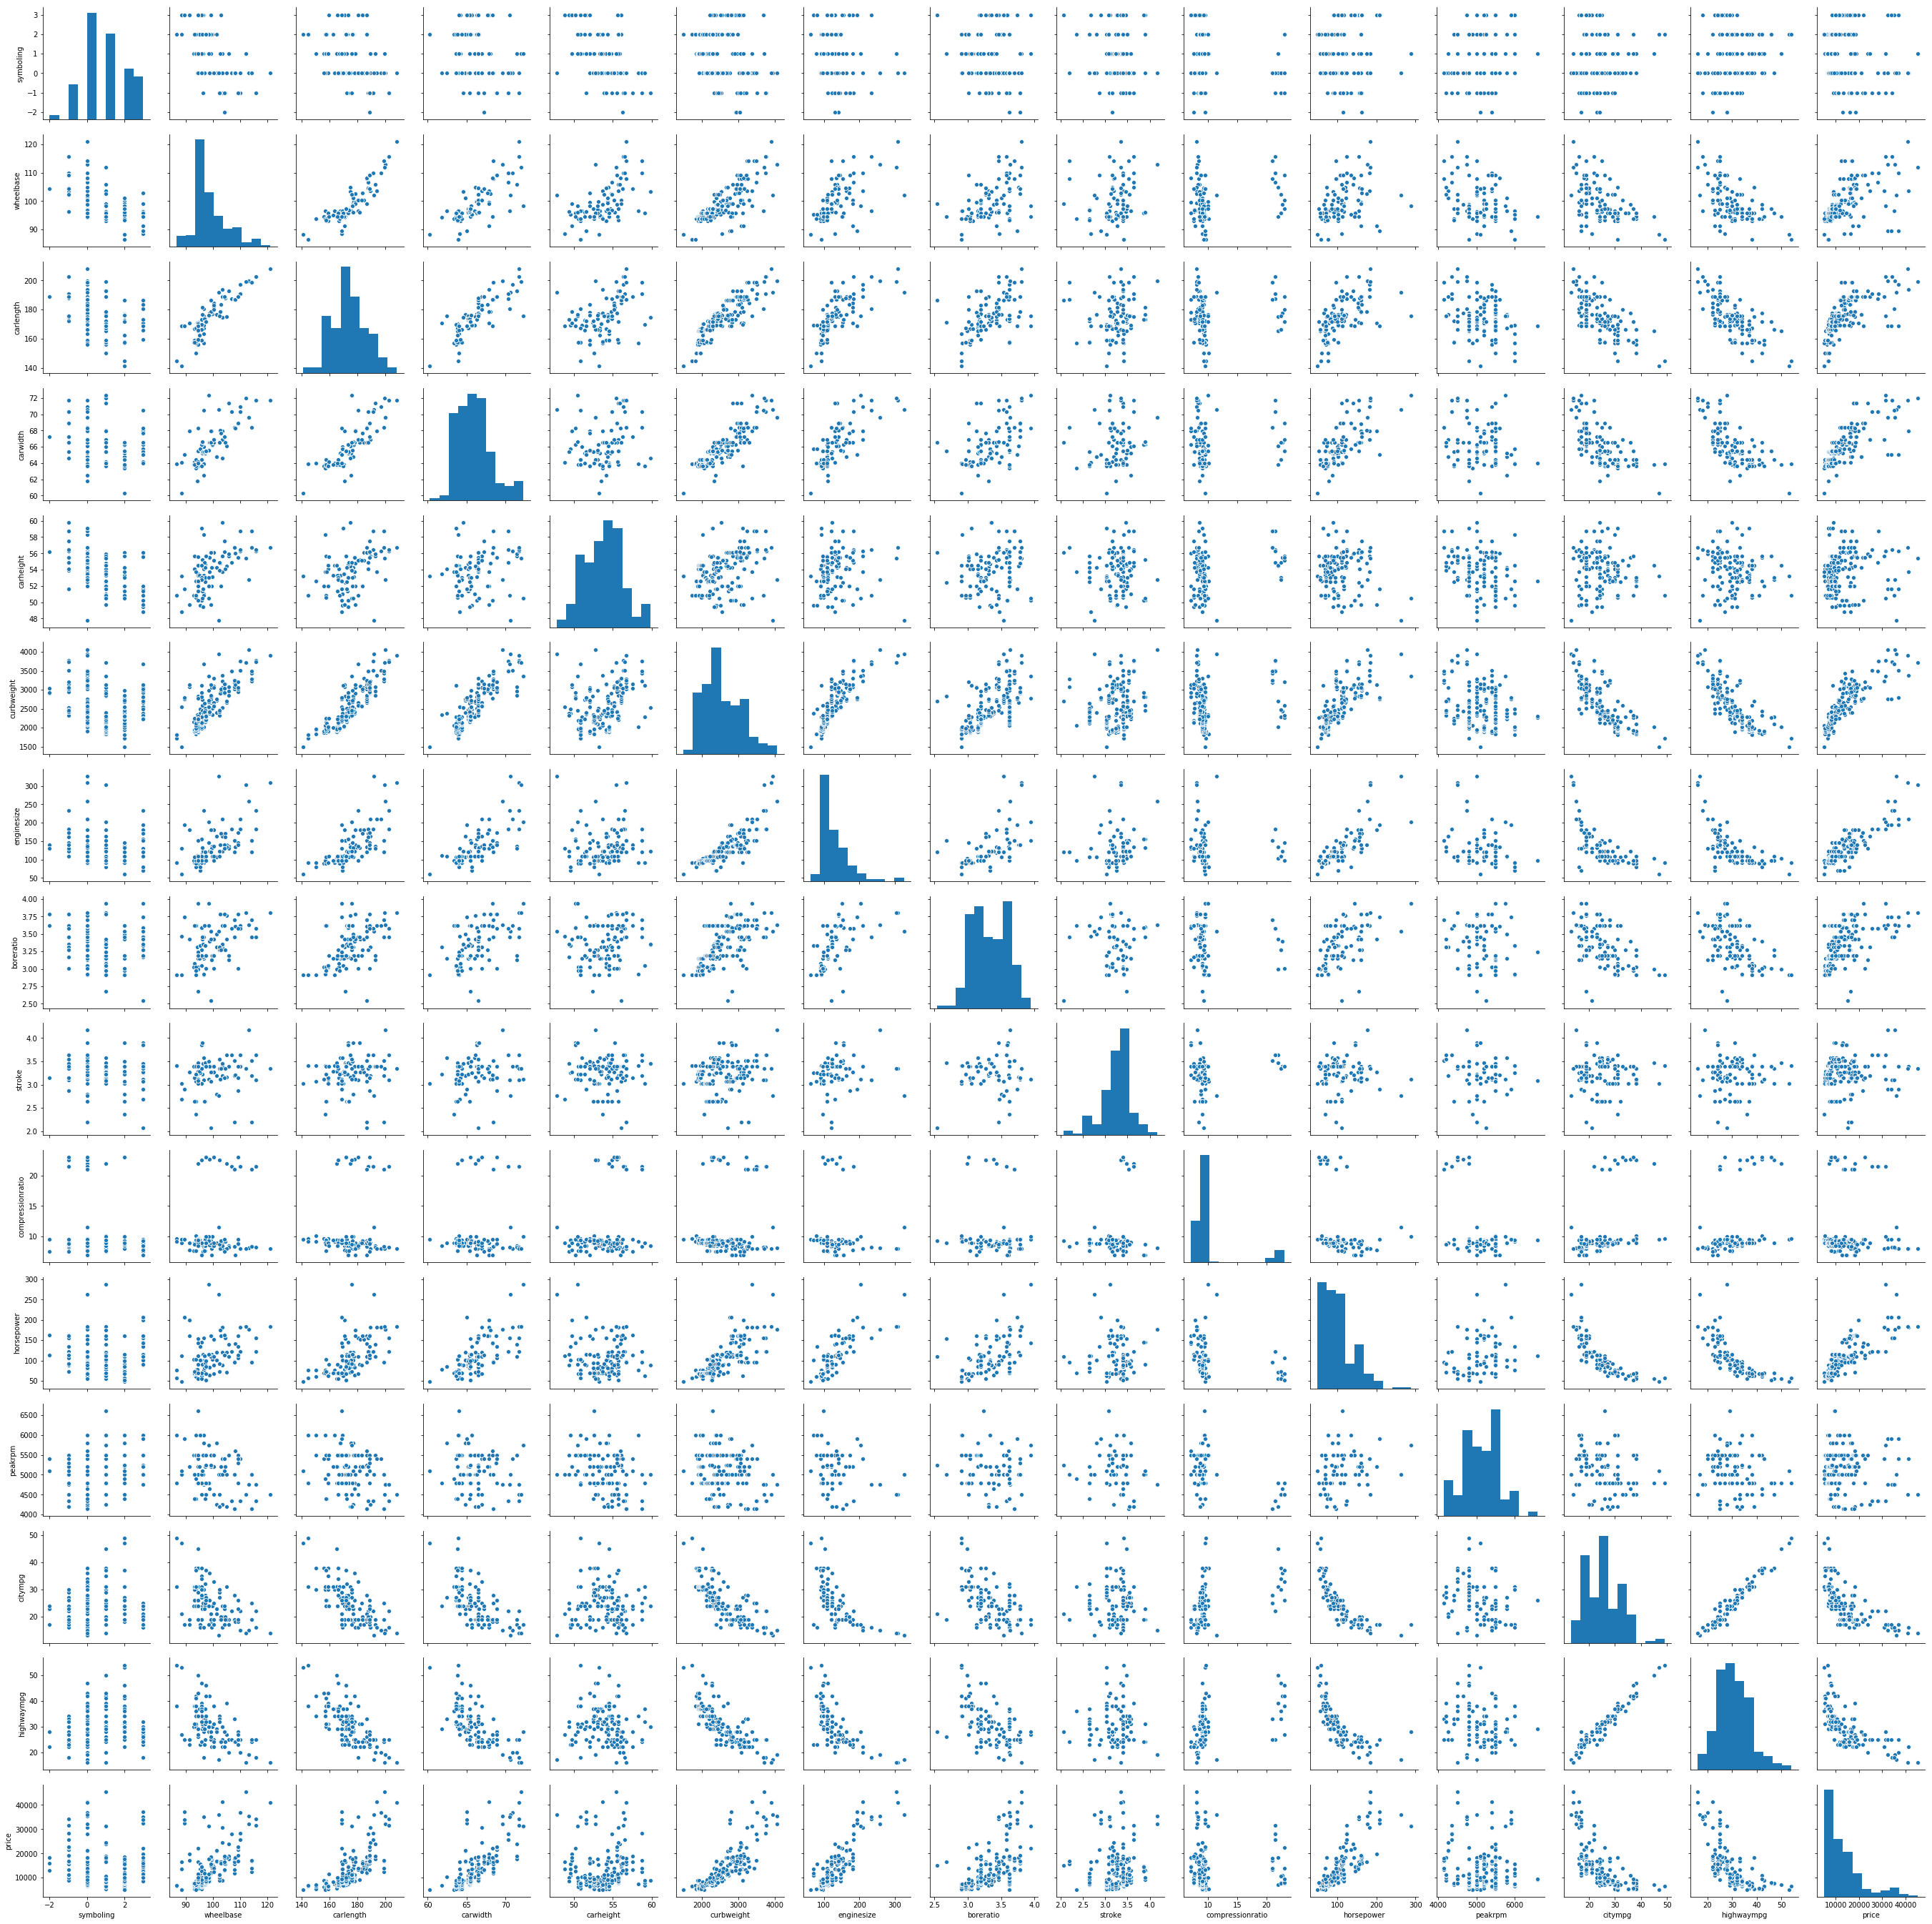

In [15]:
# Making a pairplot of all the numeric variables except 'car_ID'

sns.pairplot(carprice.drop('car_ID', axis=1))
plt.show()

In [16]:
# Checking correlation in carprice for the numeric variables except car_ID

carprice.drop('car_ID', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.0087,-0.18,0.071,0.27,-0.036,0.035,-0.08
wheelbase,-0.53,1,0.87,0.8,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.87,1,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.7,0.68
carwidth,-0.23,0.8,0.84,1,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.59,0.49,0.28,1,0.3,0.067,0.17,-0.055,0.26,-0.11,-0.32,-0.049,-0.11,0.12
curbweight,-0.23,0.78,0.88,0.87,0.3,1,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.8,0.84
enginesize,-0.11,0.57,0.68,0.74,0.067,0.85,1,0.58,0.2,0.029,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1,-0.056,0.0052,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.0087,0.16,0.13,0.18,-0.055,0.17,0.2,-0.056,1,0.19,0.081,-0.068,-0.042,-0.044,0.079
compressionratio,-0.18,0.25,0.16,0.18,0.26,0.15,0.029,0.0052,0.19,1,-0.2,-0.44,0.32,0.27,0.068


### Visualising Categorical Variables

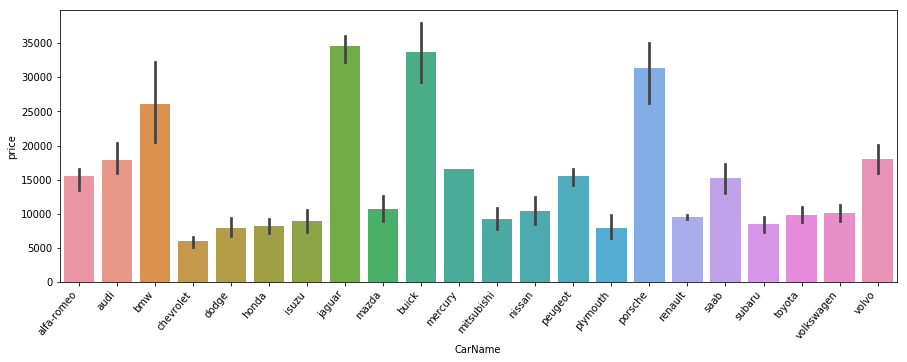

In [17]:
# Plotting for CarName separately since CarName has relatively more unique values

plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'CarName', y = 'price', data = carprice)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
plt.show()

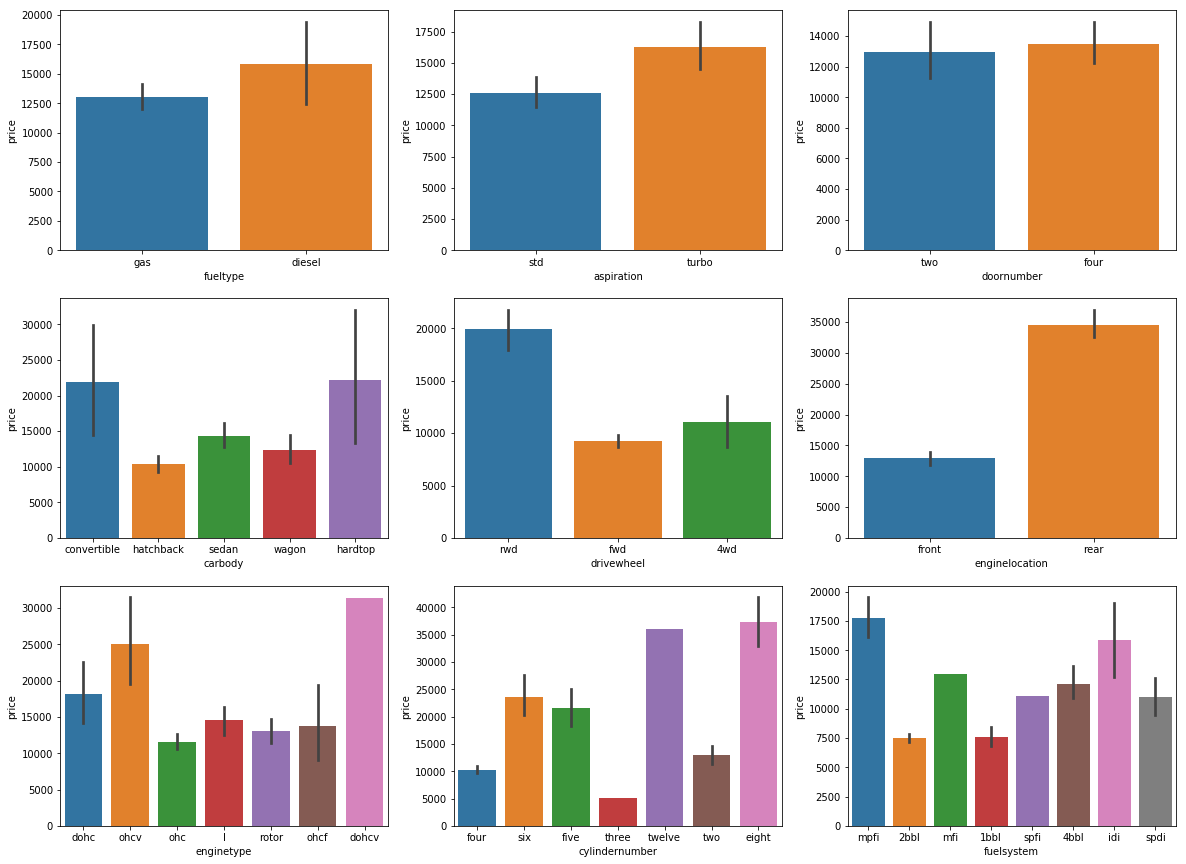

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.barplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.barplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.barplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.barplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.barplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,6)
sns.barplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(3,3,7)
sns.barplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(3,3,8)
sns.barplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(3,3,9)
sns.barplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

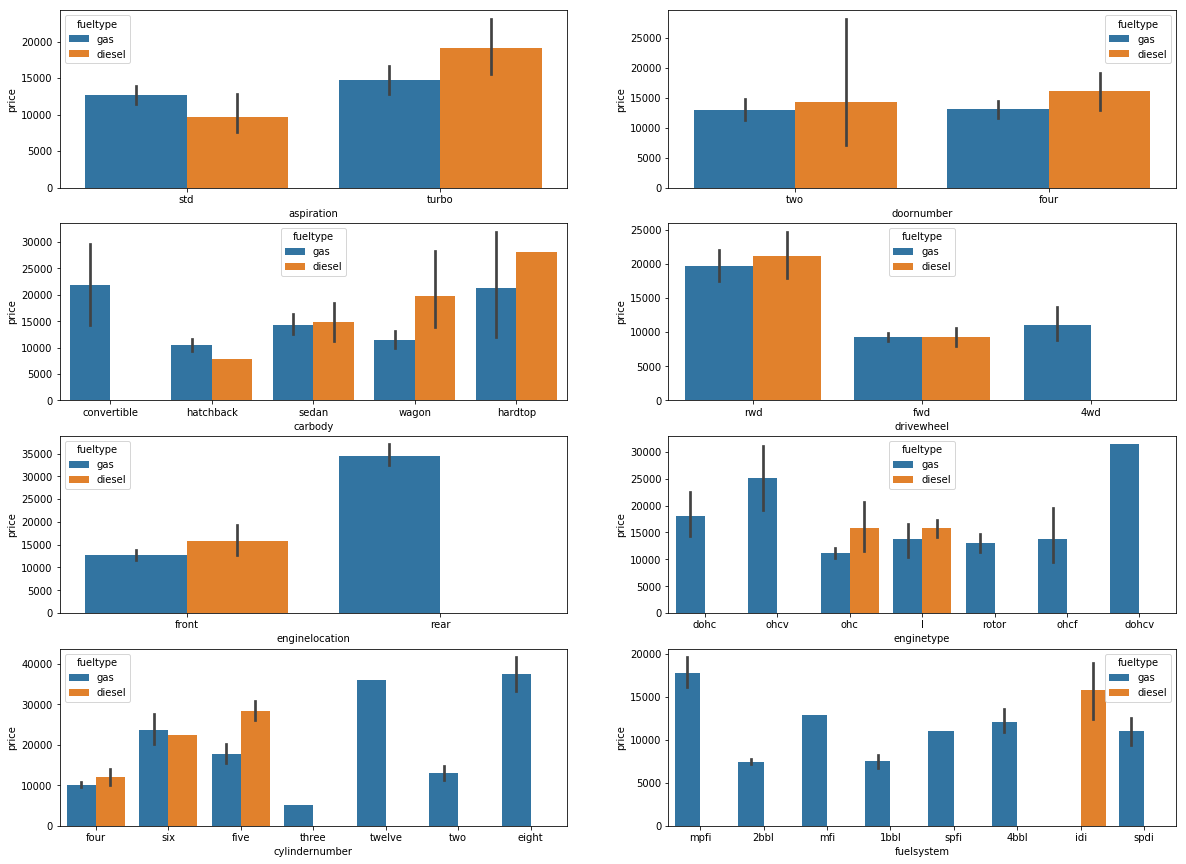

In [19]:
# Plotting categorical variables with 'fueltype' as hue

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x = 'aspiration', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,2)
sns.barplot(x = 'doornumber', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,3)
sns.barplot(x = 'carbody', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,4)
sns.barplot(x = 'drivewheel', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,5)
sns.barplot(x = 'enginelocation', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,6)
sns.barplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,7)
sns.barplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = carprice)
plt.subplot(4,2,8)
sns.barplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = carprice)
plt.show()

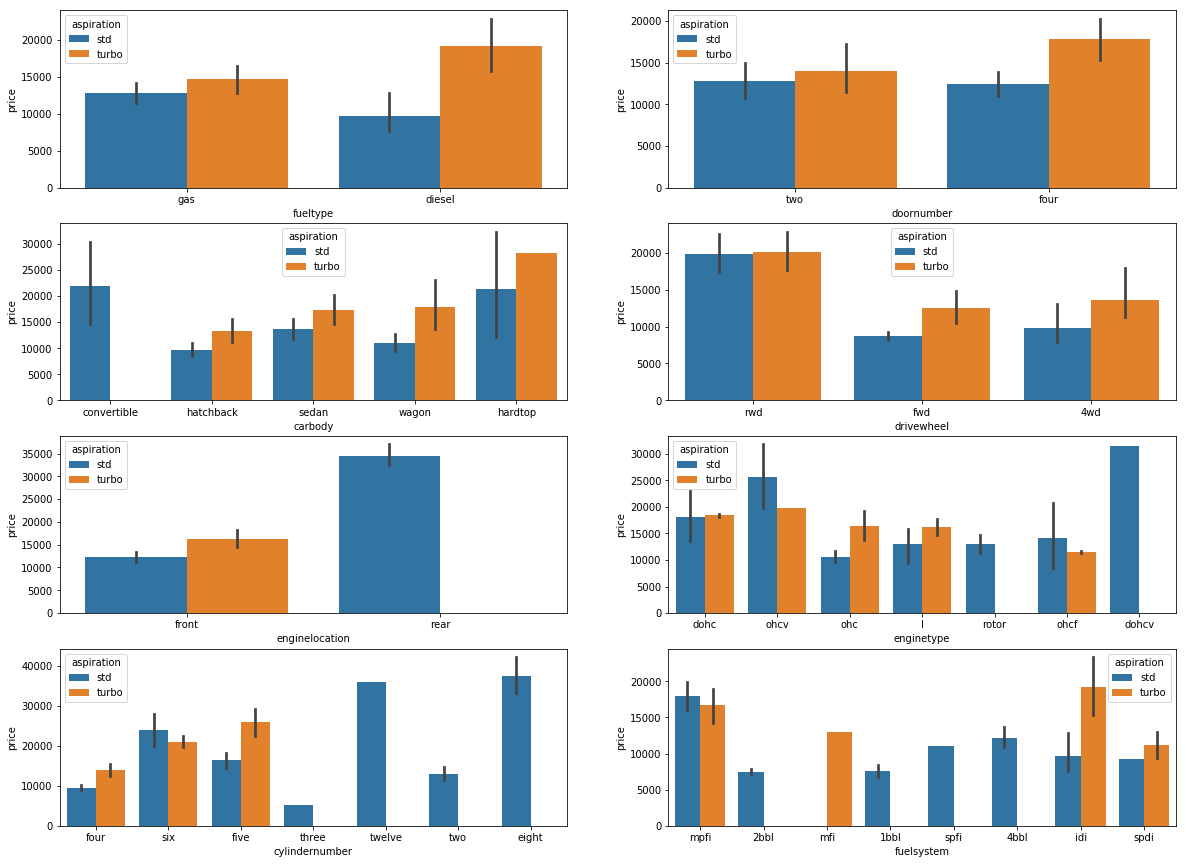

In [20]:
# Plotting categorical variables with 'aspiration' as hue

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x = 'fueltype', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,2)
sns.barplot(x = 'doornumber', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,3)
sns.barplot(x = 'carbody', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,4)
sns.barplot(x = 'drivewheel', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,5)
sns.barplot(x = 'enginelocation', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,6)
sns.barplot(x = 'enginetype', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,7)
sns.barplot(x = 'cylindernumber', y = 'price', hue = 'aspiration', data = carprice)
plt.subplot(4,2,8)
sns.barplot(x = 'fuelsystem', y = 'price', hue = 'aspiration', data = carprice)
plt.show()

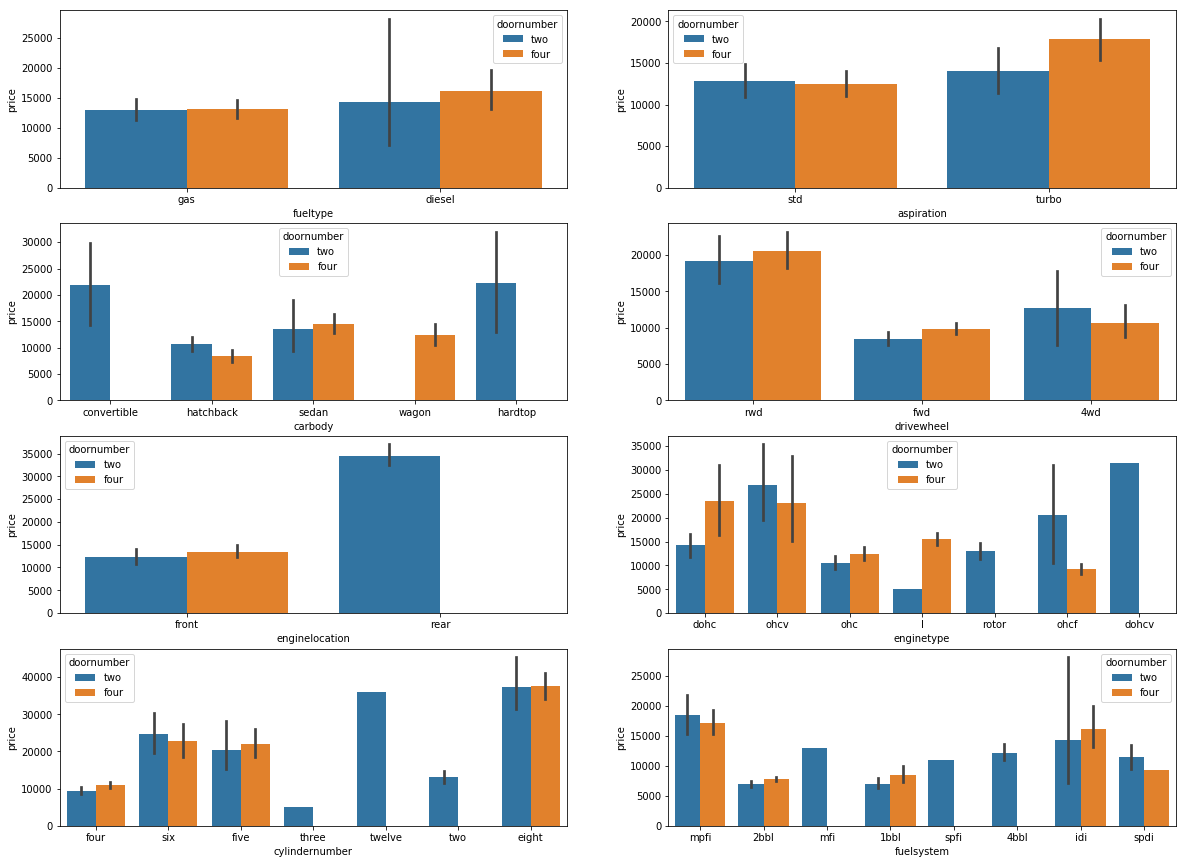

In [21]:
# Plotting categorical variables with 'doornumber' as hue

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x = 'fueltype', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,2)
sns.barplot(x = 'aspiration', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,3)
sns.barplot(x = 'carbody', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,4)
sns.barplot(x = 'drivewheel', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,5)
sns.barplot(x = 'enginelocation', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,6)
sns.barplot(x = 'enginetype', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,7)
sns.barplot(x = 'cylindernumber', y = 'price', hue = 'doornumber', data = carprice)
plt.subplot(4,2,8)
sns.barplot(x = 'fuelsystem', y = 'price', hue = 'doornumber', data = carprice)
plt.show()

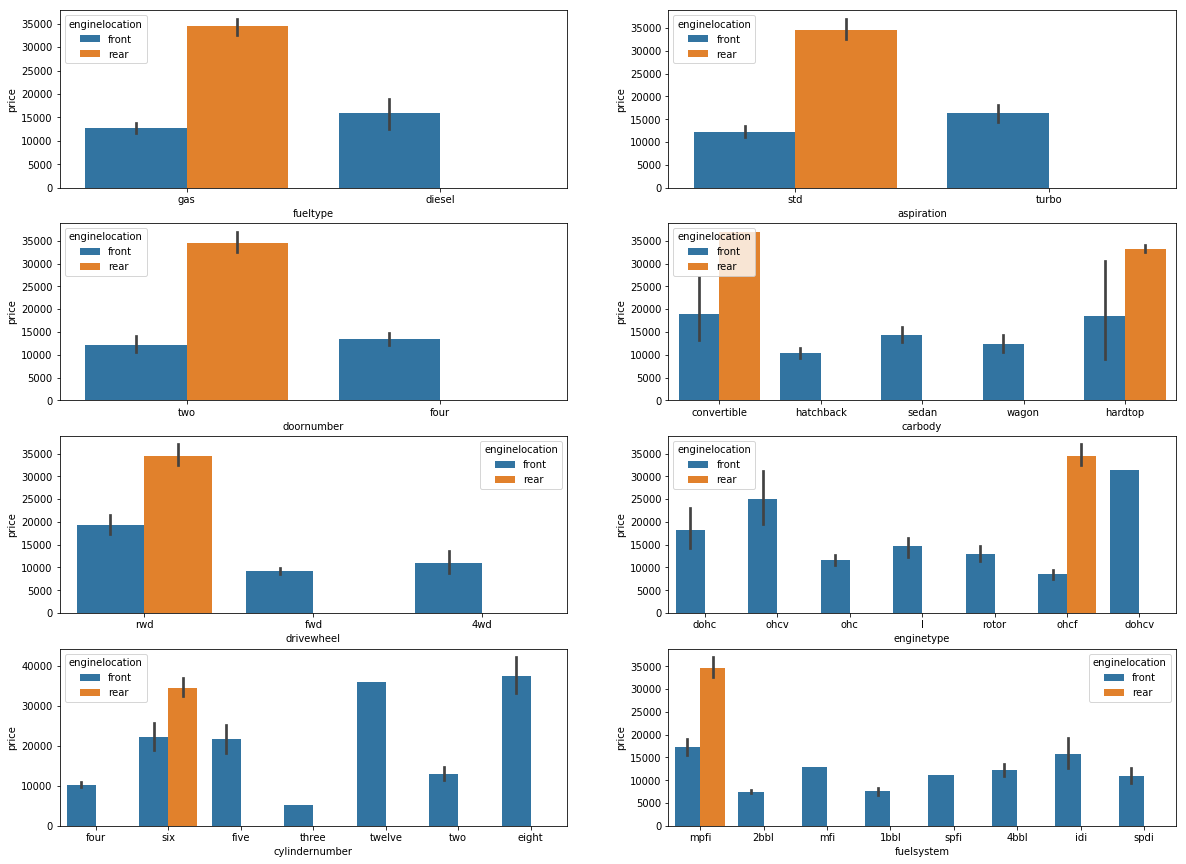

In [22]:
# Plotting categorical variables with 'enginelocation' as hue

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x = 'fueltype', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,2)
sns.barplot(x = 'aspiration', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,3)
sns.barplot(x = 'doornumber', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,4)
sns.barplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,5)
sns.barplot(x = 'drivewheel', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,6)
sns.barplot(x = 'enginetype', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,7)
sns.barplot(x = 'cylindernumber', y = 'price', hue = 'enginelocation', data = carprice)
plt.subplot(4,2,8)
sns.barplot(x = 'fuelsystem', y = 'price', hue = 'enginelocation', data = carprice)
plt.show()

### Data preparation
- #### Categorical variables

In [23]:
# Reviewing number of levels for categorical variables

for col in cat_vars:
    print(col, len(carprice[col].value_counts()))

CarName 22
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


<font color = purple> Since a few of the categorical variables have only 2 unique values, we can convert them to 1s and 0s. </font>

In [24]:
# Mapping binary variables

carprice['fueltype'] = carprice['fueltype'].map({'gas': 1, 'diesel': 0}).astype('float64')
carprice['aspiration'] = carprice['aspiration'].map({'std': 1, 'turbo': 0}).astype('float64')
carprice['doornumber'] = carprice['doornumber'].map({'four': 1, 'two': 0}).astype('float64')
carprice['enginelocation'] = carprice['enginelocation'].map({'front': 1, 'rear': 0}).astype('float64')

In [25]:
# Checking the carprice dataframe to confirm the above change

carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romeo,1.0,1.0,0.0,convertible,rwd,1.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romeo,1.0,1.0,0.0,convertible,rwd,1.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romeo,1.0,1.0,0.0,hatchback,rwd,1.0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1.0,1.0,1.0,sedan,fwd,1.0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1.0,1.0,1.0,sedan,4wd,1.0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Derived variables
<font color = purple> `CarName` has 22 levels. These can be grouped by country of origin. </font>

In [26]:
# Mapping values for 'CarName' to their appropriate country of origin
# and creating a new column called 'carcountry' with these values

carprice['carcountry'] = carprice['CarName'].map({'toyota' : 'Japan', 'nissan' : 'Japan', 'mazda' : 'Japan',
                                                  'honda' : 'Japan', 'mitsubishi' : 'Japan', 'volkswagen' : 'Germany',
                                                  'subaru' : 'Japan', 'peugeot' : 'France', 'volvo' : 'Sweden',
                                                  'dodge' : 'US', 'bmw' : 'Germany', 'buick' : 'US', 'plymouth' : 'US',
                                                  'audi' : 'Germany', 'saab' : 'Sweden', 'porsche' : 'Germany',
                                                  'isuzu' : 'Japan', 'chevrolet' : 'US', 'jaguar' : 'UK',
                                                  'alfa-romeo' : 'Italy', 'renault' : 'France', 'mercury' : 'US'})

In [27]:
# Checking the value counts for the new column 'carcountry'

carprice.carcountry.value_counts()

Japan      109
Germany     32
US          28
Sweden      17
France      13
UK           3
Italy        3
Name: carcountry, dtype: int64

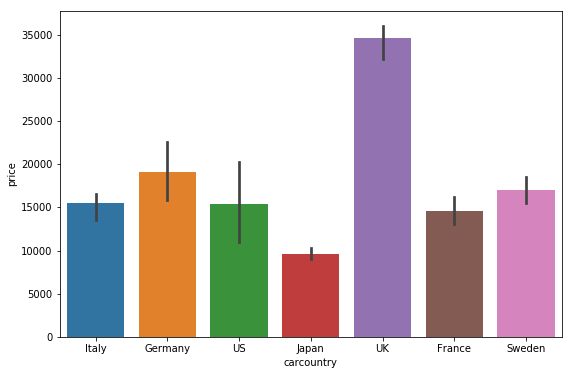

In [28]:
# Visualizing 'carcountry'

plt.figure(figsize=(9,6))
sns.barplot(x = 'carcountry', y = 'price', data = carprice)
plt.show()

<font color = purple> `carcountry` has 7 levels. These can be grouped by region. </font>

In [29]:
# Mapping values for 'carcountry' to their appropriate region of origin
# and creating a new column called 'car_region' with these values

carprice['car_region'] = carprice['carcountry'].map({'Japan' : 'Japanese', 'Germany' : 'European', 'US' : 'American',
                                                     'Sweden' : 'European', 'France' : 'European', 'UK' : 'European',
                                                     'Italy' : 'European'})

In [30]:
# Checking the value counts for the new column 'car_region'

carprice.car_region.value_counts()

Japanese    109
European     68
American     28
Name: car_region, dtype: int64

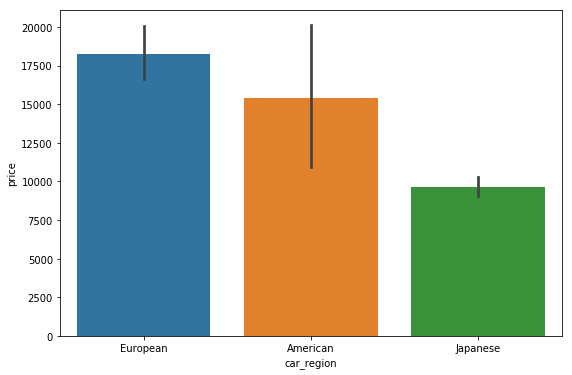

In [31]:
# Visualizing 'car_region'

plt.figure(figsize=(9,6))
sns.barplot(x = 'car_region', y = 'price', data = carprice)
plt.show()

#### Dummy variables
<font color = purple> The categorical variables `CarName`, `carbody`, `drivewheel`, `enginetype`, `fuelsystem`, `carcountry` and `car_region` have 22, 5, 3, 7, 8, 7 and 3 levels respectively. These will be converted into integers as well using dummy variables. </font>

In [32]:
# Getting dummy variables for the following variables: 
# 'CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'carcountry' and 'car_region'

dummy_vars = ['CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'carcountry', 'car_region']

dummy = pd.concat([pd.get_dummies(carprice[col], dtype=float) for col in dummy_vars], axis=1)

dummy.head()

,alfa-romeo,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,France,Germany,Italy,Japan,Sweden,UK,US,American,European,Japanese
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Dropping one level from each variable i.e. 'alfa-romeo', 'convertible', '4wd', 'dohc', '1bbl', 'France' and 'American'

dummy.drop(['alfa-romeo', 'convertible', '4wd', 'dohc', '1bbl', 'France', 'American'], axis = 1, inplace = True)

dummy.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Adding the results back to the original carprice dataframe

carprice = pd.concat([carprice, dummy], axis = 1)

In [35]:
# Checking carprice to confirm changes made

carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcountry,car_region,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
0,1,3,alfa-romeo,1.0,1.0,0.0,convertible,rwd,1.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Italy,European,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,alfa-romeo,1.0,1.0,0.0,convertible,rwd,1.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Italy,European,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,alfa-romeo,1.0,1.0,0.0,hatchback,rwd,1.0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Italy,European,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,audi,1.0,1.0,1.0,sedan,fwd,1.0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Germany,European,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,2,audi,1.0,1.0,1.0,sedan,4wd,1.0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Germany,European,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Dropping 'CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'carcountry' and 'car_region'
# as we have created dummy variables for them

carprice.drop(['CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'carcountry', 'car_region'], axis = 1, inplace = True)

In [37]:
carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
0,1,3,1.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,1.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,1.0,1.0,0.0,1.0,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,1.0,1.0,1.0,1.0,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,2,1.0,1.0,1.0,1.0,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Data preparation
- #### Numerical variables

In [38]:
# Reviewing value counts for the 'cylindernumber' variable

carprice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

<font color = purple> Since `cylindernumber` is clearly a discrete numerical variable, it will be encoded appropriately. </font>

In [39]:
# Mapping values for 'cylindernumber' to the actual number they represent

carprice['cylindernumber'] = carprice['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'eight': 8,
                                                             'two': 2, 'twelve': 12, 'three': 3}).astype('float64')

In [40]:
# Checking value counts for 'cylindernumber' to confirm change

carprice.cylindernumber.value_counts()

4.0     159
6.0      24
5.0      11
8.0       5
2.0       4
12.0      1
3.0       1
Name: cylindernumber, dtype: int64

In [41]:
# Reviewing value counts for 'symboling'

carprice.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [42]:
# Treating 'symboling' data from the original range of (-2 to 3) to (0 to 5)
# by adding 2 to each record in order to make each value positive

carprice['symboling'] = carprice.symboling.apply(lambda x: x+2).astype('float64')

In [43]:
carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
0,1,5.0,1.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,5.0,1.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,3.0,1.0,1.0,0.0,1.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,4.0,1.0,1.0,1.0,1.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,4.0,1.0,1.0,1.0,1.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<font color = purple> Identifying outliers for the numerical variables </font>

In [44]:
# Creating a list of column names for the numerical variables

num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

print(num_vars)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [45]:
# Looping through each value of the con_vars list

for i in num_vars:

    Q1 = carprice[i].quantile(0.25)        # taking the value of first quantile for each column
    Q3 = carprice[i].quantile(0.75)        # taking the value of third quantile for each column

    IQR = Q3 - Q1                          # finding the inter-quartile range

    lower_fence = Q1 - 1.5*IQR             # calculating the lower fence
    upper_fence = Q3 + 1.5*IQR             # calculating the upper fence

    # Capturing all the values lower than the lower fence and higher than the upper fence
    outliers = (carprice[i] < lower_fence) | (carprice[i] > upper_fence)
    
    # setting the title of the column
    print(i)                    
    
    # printing the outlier value count for the column
    print(outliers.value_counts(), end='\n\n')

symboling
False    205
Name: symboling, dtype: int64

wheelbase
False    202
True       3
Name: wheelbase, dtype: int64

carlength
False    204
True       1
Name: carlength, dtype: int64

carwidth
False    197
True       8
Name: carwidth, dtype: int64

carheight
False    205
Name: carheight, dtype: int64

curbweight
False    205
Name: curbweight, dtype: int64

cylindernumber
False    159
True      46
Name: cylindernumber, dtype: int64

enginesize
False    195
True      10
Name: enginesize, dtype: int64

boreratio
False    205
Name: boreratio, dtype: int64

stroke
False    185
True      20
Name: stroke, dtype: int64

compressionratio
False    177
True      28
Name: compressionratio, dtype: int64

horsepower
False    199
True       6
Name: horsepower, dtype: int64

peakrpm
False    203
True       2
Name: peakrpm, dtype: int64

citympg
False    203
True       2
Name: citympg, dtype: int64

highwaympg
False    202
True       3
Name: highwaympg, dtype: int64



<font color = purple> Since most of the numerical variables don't have too many outliers, I will leave them be instead of treating or removing them. </font>

In [47]:
# Dropping car_ID since it's not likely to impact the dependent variable 'price'

carprice.drop(['car_ID'], axis = 1, inplace = True)

In [48]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
0,5.0,1.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.0,1.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,1.0,1.0,0.0,1.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,1.0,1.0,1.0,1.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,1.0,1.0,1.0,1.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Reviewing number of columns in carprice

carprice.shape[1]

68

### Splitting the Data into Training and Testing Sets

In [50]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features
<font color = purple> I will use Standard scaling. </font>

In [51]:
from sklearn.preprocessing import StandardScaler

# Creating a scaler object using StandardScaler()
scaler = StandardScaler()

In [52]:
# Applying scaler() to all the columns except the converted binary variables and 'dummy' variables

scale_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'cylindernumber', 'enginesize',
              'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

df_train.head()

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shash\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
122,0.170159,1.0,1.0,1.0,1.0,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,-0.700201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
125,1.848278,1.0,1.0,0.0,1.0,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,1.151929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
166,0.170159,1.0,1.0,0.0,1.0,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,-0.452248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.848278,1.0,1.0,0.0,1.0,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,0.442646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
199,-1.507960,1.0,0.0,1.0,1.0,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,0.757569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Germany,Italy,Japan,Sweden,UK,US,European,Japanese
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.059758e-16,0.909091,0.818182,0.559441,0.993007,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,2.155230e-15,7.259151e-17,1.195625e-16,6.009179e-16,2.655219e-16,1.599342e-16,1.925422e-16,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.146853,0.020979,0.552448,0.062937,0.020979,0.125874,0.321678,0.552448
std,1.003515e+00,0.288490,0.387050,0.498199,0.083624,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.355204,0.143818,0.498989,0.243703,0.143818,0.332873,0.468762,0.498989
min,-2.347020e+00,0.000000,0.000000,0.000000,0.000000,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,-8.072216e-01,-1.378157e+00,-2.043565e+00,-1.855458e+00,-1.996497e+00,-1.020394e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,1.000000,1.000000,0.000000,1.000000,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,-3.841200e-01,-8.223718e-01,-6.882361e-01,-9.570476e-01,-8.452912e-01,-7.072706e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,1.

### Dividing into X and Y sets for the model building

In [54]:
# Creating X_train and y_train

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

### Building the model using `RFE`
<font color = purple> Recursive Feature Elimination  </font>

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Confirming total number of variables in X_train

X_train.shape

(143, 67)

In [57]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)              # running RFE
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 46),
 ('fueltype', True, 1),
 ('aspiration', False, 16),
 ('doornumber', False, 38),
 ('enginelocation', True, 1),
 ('wheelbase', False, 10),
 ('carlength', False, 3),
 ('carwidth', True, 1),
 ('carheight', False, 9),
 ('curbweight', False, 2),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', False, 19),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 25),
 ('peakrpm', False, 21),
 ('citympg', False, 37),
 ('highwaympg', False, 22),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 18),
 ('dodge', False, 8),
 ('honda', False, 17),
 ('isuzu', False, 29),
 ('jaguar', False, 40),
 ('mazda', False, 28),
 ('mercury', False, 45),
 ('mitsubishi', True, 1),
 ('nissan', False, 30),
 ('peugeot', True, 1),
 ('plymouth', False, 7),
 ('porsche', False, 13),
 ('renault', True, 1),
 ('saab', False, 6),
 ('subaru', True, 1),
 ('toyota', False, 26),
 ('volkswagen', True, 1),
 ('volvo', False, 33

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'enginesize',
       'compressionratio', 'audi', 'bmw', 'buick', 'mitsubishi', 'peugeot',
       'renault', 'subaru', 'volkswagen', 'l', 'ohcf', 'rotor', '4bbl', 'idi',
       'Germany', 'European'],
      dtype='object')

### Building the model using `statsmodel` for detailed statistics

In [60]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model 1

In [61]:
import statsmodels.api as sm

# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
lm = sm.OLS(y_train, X_train_rfe).fit()   # Running the linear model

In [63]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     114.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.04e-68
Time:                        11:22:00   Log-Likelihood:                 2.0039
No. Observations:                 143   AIC:                             33.99
Df Residuals:                     124   BIC:                             90.29
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8202      0.177  

<font color = purple> Given that `4bbl` has a high p-value of `0.256`, it can be dropped. </font>

In [64]:
X_train_new = X_train_rfe.drop(['4bbl'], axis = 1)

<font color = purple> Rebuilding the model without `4bbl` </font>

#### Model 2

In [65]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [66]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [67]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.88e-69
Time:                        11:22:00   Log-Likelihood:                 1.2583
No. Observations:                 143   AIC:                             33.48
Df Residuals:                     125   BIC:                             86.81
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8185      0.178  

<font color = purple>  Given that `bmw` has a high p-value of `0.075`, it can be dropped. </font>

In [68]:
X_train_new = X_train_new.drop(['bmw'], axis = 1)

<font color = purple> Rebuilding the model without `bmw` </font>

#### Model 3

In [69]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [70]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [71]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.93e-69
Time:                        11:22:00   Log-Likelihood:               -0.56617
No. Observations:                 143   AIC:                             35.13
Df Residuals:                     126   BIC:                             85.50
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7351      0.173  

In [72]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
10,subaru,inf
15,idi,inf
13,ohcf,inf
1,enginelocation,inf
4,compressionratio,47.29
8,peugeot,10.91
12,l,9.20
2,carwidth,4.75
3,enginesize,3.70


<font color = purple> Given that all the p-values are now below `0.05`, I will focus on high VIF values, starting with `fueltype` which will be dropped. </font>

In [74]:
X_train_new = X_train_new.drop(['fueltype'], axis = 1)

<font color = purple> Rebuilding the model without `fueltype`. </font>

#### Model 4

In [75]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [76]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [77]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.93e-69
Time:                        11:22:00   Log-Likelihood:               -0.56617
No. Observations:                 143   AIC:                             35.13
Df Residuals:                     126   BIC:                             85.50
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2613      0.151  

In [78]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,idi,49.83
3,compressionratio,47.29
9,subaru,15.60
12,ohcf,15.04
7,peugeot,10.91
11,l,9.20
0,enginelocation,6.21
1,carwidth,4.75
2,enginesize,3.70
16,European,3.50


<font color = purple> Given that all the p-values are now below `0.05`, I will focus on high VIF values, starting with `idi` which will be dropped. </font>

In [79]:
X_train_new = X_train_new.drop(['idi'], axis = 1)

<font color = purple> Rebuilding the model without `idi`. </font>

#### Model 5

In [80]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [81]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [82]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.03e-67
Time:                        11:22:01   Log-Likelihood:                -8.1722
No. Observations:                 143   AIC:                             48.34
Df Residuals:                     127   BIC:                             95.75
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3184      0.158  

<font color = purple> Given that `compressionratio` has a high p-value of `0.784` it can be dropped. </font>

In [83]:
X_train_new = X_train_new.drop(['compressionratio'], axis = 1)

<font color = purple> Rebuilding the model without `compressionratio`. </font>

#### Model 6

In [84]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [85]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [86]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     130.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.81e-68
Time:                        11:22:01   Log-Likelihood:                -8.2146
No. Observations:                 143   AIC:                             46.43
Df Residuals:                     128   BIC:                             90.87
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3211      0.157      2.

<font color = purple> Given that `mitsubishi` has a high p-value of `0.140` it can be dropped. </font>

In [87]:
X_train_new = X_train_new.drop(['mitsubishi'], axis = 1)

<font color = purple> Rebuilding the model without `mitsubishi`. </font>

#### Model 7

In [88]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [89]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [90]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.46e-69
Time:                        11:22:01   Log-Likelihood:                -9.4349
No. Observations:                 143   AIC:                             46.87
Df Residuals:                     129   BIC:                             88.35
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2997      0.157      1.

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,subaru,15.39
10,ohcf,14.92
5,peugeot,10.24
9,l,9.16
1,carwidth,4.64
2,enginesize,3.64
12,Germany,3.44
13,European,3.39
0,enginelocation,2.46
8,volkswagen,1.98


<font color = purple> Given that all the p-values are now below `0.05`, I will focus on high VIF values, starting with `subaru` which will be dropped. </font>

In [92]:
X_train_new = X_train_new.drop(['subaru'], axis = 1)

<font color = purple> Rebuilding the model without `subaru`. </font>

#### Model 8

In [93]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [94]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [95]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.46e-69
Time:                        11:22:01   Log-Likelihood:                -9.4349
No. Observations:                 143   AIC:                             46.87
Df Residuals:                     129   BIC:                             88.35
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7351      0.322      2.

<font color = purple> Given that `ohcf` has a high p-value of `0.683` it can be dropped. </font>

In [96]:
X_train_new = X_train_new.drop(['ohcf'], axis = 1)

<font color = purple> Rebuilding the model without `ohcf`. </font>

#### Model 9

In [97]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [98]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [99]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.85e-70
Time:                        11:22:01   Log-Likelihood:                -9.5277
No. Observations:                 143   AIC:                             45.06
Df Residuals:                     130   BIC:                             83.57
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6904      0.302      2.

In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,peugeot,10.77
8,l,9.74
11,European,4.89
1,carwidth,4.21
10,Germany,3.77
2,enginesize,3.44
0,enginelocation,2.10
7,volkswagen,2.00
3,audi,1.84
4,buick,1.68


<font color = purple> Given that all the p-values are now below `0.05`, I will focus on high VIF values, starting with `peugeot` which will be dropped. </font>

In [101]:
X_train_new = X_train_new.drop(['peugeot'], axis = 1)

<font color = purple> Rebuilding the model without `peugeot`. </font>

#### Model 10

In [102]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [103]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [104]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.02e-69
Time:                        11:22:01   Log-Likelihood:                -14.933
No. Observations:                 143   AIC:                             53.87
Df Residuals:                     131   BIC:                             89.42
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6091      0.311      1.

In [105]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,European,4.82
1,carwidth,3.77
9,Germany,3.72
2,enginesize,3.34
0,enginelocation,2.10
6,volkswagen,2.00
3,audi,1.82
4,buick,1.65
7,l,1.59
8,rotor,1.19


<font color = purple> Since the p-values and VIFs are both within an acceptable range, I will go ahead and make my prediction using this model. </font>

### Residual Analysis of the train data

<font color = purple> Checking if the error terms are also normally distributed (one of the assumptions of linear regression) </font>

In [106]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

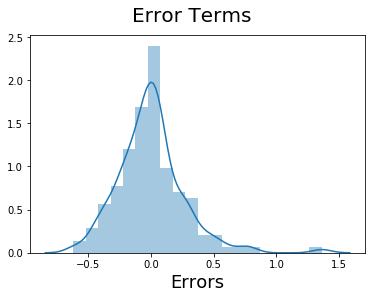

In [107]:
# Plotting the histogram of the error terms to see what it looks like

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Calculating the `R-squared score` on the train set

In [108]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_price)

0.9278516287096774

#### Checking the `RMSE` on the train set

In [109]:
from sklearn.metrics import mean_squared_error

# Calculating the root mean squared error

np.sqrt(mean_squared_error(y_train, y_train_price))

0.2686044885893059

### Making Predictions
<font color = purple> Applying the scaling on the test sets </font>

In [110]:
scale_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'cylindernumber', 'enginesize',
              'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<font color = purple> Dividing into X_test and y_test </font>

In [111]:
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

<font color = purple> Using my model to make predictions </font>

In [112]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [113]:
# Making predictions

y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

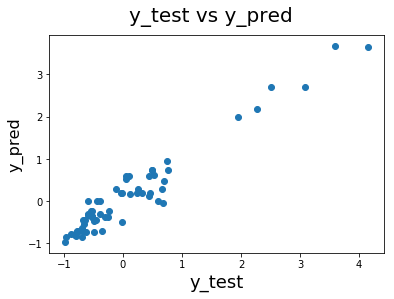

In [114]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Checking the `RMSE` on the test set

In [115]:
# Calculating the root mean squared error

np.sqrt(mean_squared_error(y_test, y_pred))

0.2730015484284622

## <font color = purple > Calculating the `R-squared score` on the test set </font>

In [116]:
r2_score(y_test, y_pred)

0.9355865639092342

<font color = purple> We can see that the equation of our best fitted line is: </font>

$ price = -0.8561  \times  enginelocation + 0.1831  \times  carwidth + 0.5137 \times enginesize - 0.6994 \times audi + 1.1375 \times buick - 0.8815 \times renault - 1.1163 \times volkswagen - 0.2492 \times l + 0.9140 \times rotor + 0.7515 \times Germany + 0.5361 \times European $


<font color = purple> It would appear that not all the predictor variables have a positive impact on the price of a car, namely `enginelocation`, `audi`, `renault`, `volkswagen` and `l`.</font>

<font color = purple> Overall this a pretty good model but could be improved. <br><br>
We have a couple of options:

   1. Add more derived variables / new features; this would be faciliated by better domain knowledge.
   2. Build a non-linear model    </font>


# End of Linear Regression Assignment